In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datasets = [
        '20newsgroups',
        'avila',
        'banknote',
        'cancerwisconsin',
        'car',
        'cargo',
        'credit',
        'crowd',
        'diabetes',
        'digits',
        'frog-family',
        'frog-genus',
        'frog-species',
        'hcv',
        'htru',
        'ionosfera',
        'iranian',
        'iris',
        'mice',
        'mushroom',
        'obesity',
        'occupancy',
        'pen',
        'qualitywine',
        'robot',
        'sensorless',
        'shill',
        'sonar',
        'taiwan',
        'thyroid',
        'vowel',
        'wifi',
        'wine',
        'myocardial'
    ]

models = ['Normal_AdaBoost', 'Normal_GradientBoosting', 'Normal_XGBoost',
         'Normal_ExtraTrees', 'Approval_ExtraTrees', 'Plurality_ExtraTrees',
         'Borda_ExtraTrees','Copeland_ExtraTrees','Poss_ExtraTrees',
         'PossProd_ExtraTrees','Threeway_ExtraTrees',
         'Normal_RandomForest', 'Approval_RandomForest', 'Plurality_RandomForest',
         'Borda_RandomForest','Copeland_RandomForest','Poss_RandomForest',
         'PossProd_RandomForest','Threeway_RandomForest',
         'SPA_DecisionTree','SPA_ExtraTree','TreeStrains']

shortened_names = ["AB", "GB", "XGB", "Normal_ET", "Approval_ET", "Plurality_ET",
                  "Borda_ET", "Copeland_ET", "Poss_ET", "PossProd_ET", "Threeway_ET",
                  "Normal_RF", "Approval_RF", "Plurality_RF", "Borda_RF", "Copeland_RF",
                  "Poss_RF", "PossProd_RF", "Threeway_RF", "SPA_DT", "SPA_ET",'TSC']

names_dict = dict(zip(models, shortened_names))

files = ['./Results/JSON/' + name + '.json' for name in datasets]

attributes = ["Classi","Features","OriginalRows"]

metrics = ['balacc','acc','microf1','macrof1','time']
metric_dict = {'balacc': 'Balanced Accuracy',
              'acc': 'Accuracy',
              'microf1': 'Micro-average F1',
              'macrof1': 'Macro-average F1',
              'time': 'Running Time (ms)'}

names_dict

{'Normal_AdaBoost': 'AB',
 'Normal_GradientBoosting': 'GB',
 'Normal_XGBoost': 'XGB',
 'Normal_ExtraTrees': 'Normal_ET',
 'Approval_ExtraTrees': 'Approval_ET',
 'Plurality_ExtraTrees': 'Plurality_ET',
 'Borda_ExtraTrees': 'Borda_ET',
 'Copeland_ExtraTrees': 'Copeland_ET',
 'Poss_ExtraTrees': 'Poss_ET',
 'PossProd_ExtraTrees': 'PossProd_ET',
 'Threeway_ExtraTrees': 'Threeway_ET',
 'Normal_RandomForest': 'Normal_RF',
 'Approval_RandomForest': 'Approval_RF',
 'Plurality_RandomForest': 'Plurality_RF',
 'Borda_RandomForest': 'Borda_RF',
 'Copeland_RandomForest': 'Copeland_RF',
 'Poss_RandomForest': 'Poss_RF',
 'PossProd_RandomForest': 'PossProd_RF',
 'Threeway_RandomForest': 'Threeway_RF',
 'SPA_DecisionTree': 'SPA_DT',
 'SPA_ExtraTree': 'SPA_ET',
 'TreeStrains': 'TSC'}

In [3]:
df_acc = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)
df_time = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)
df_balacc = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)
df_microf1 = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)
df_macrof1 = pd.DataFrame(np.zeros((len(datasets), len(shortened_names))), index=datasets, columns=shortened_names)

df_atts = pd.DataFrame(np.zeros((len(datasets), len(attributes))), index=datasets, columns=attributes)

dic = dict(zip(metrics, [df_acc, df_time, df_balacc, df_microf1, df_macrof1]))

In [4]:
for dataset in datasets:
    file = './Results/JSON/' + dataset + '.json'
    with open(file) as f:
      data = json.load(f)
    for model in models:
        for metric in metrics:
            dic[metric].loc[dataset,names_dict[model]] = data[model + metric]
            if data[model + metric] > 1 and metric != 'time':
                print(dataset)
    for attr in attributes:
        df_atts.loc[dataset,attr] = data[attr]
dic['balacc']

,AB,GB,XGB,Normal_ET,Approval_ET,Plurality_ET,Borda_ET,Copeland_ET,Poss_ET,PossProd_ET,...,Approval_RF,Plurality_RF,Borda_RF,Copeland_RF,Poss_RF,PossProd_RF,Threeway_RF,SPA_DT,SPA_ET,TSC
20newsgroups,0.527436,0.545250,0.606598,0.774189,0.747676,0.775071,0.775071,0.775071,0.775071,0.754359,...,0.757696,0.770984,0.760925,0.768346,0.747748,0.759831,0.769517,0.648954,0.635603,0.580064
avila,0.885877,0.970059,0.990151,0.985271,0.985271,0.985271,0.942928,0.944847,0.985271,0.941807,...,0.987132,0.987132,0.965101,0.971006,0.987132,0.914318,0.987132,0.989342,0.930776,0.942498
banknote,0.996393,0.985896,0.992449,0.998688,0.998688,0.998688,0.998688,0.998688,0.998688,0.916395,...,0.990650,0.990650,0.990650,0.990650,0.990650,0.909859,0.990650,0.985244,0.999344,0.816865
cancerwisconsin,0.965431,0.930502,0.958251,0.964474,0.964474,0.964474,0.964474,0.964474,0.964474,0.925607,...,0.970582,0.970582,0.970582,0.970582,0.970582,0.904694,0.970582,0.964057,0.964253,0.940831
car,0.730739,0.751535,0.669549,0.770084,0.770084,0.770084,0.743818,0.723410,0.770084,0.750000,...,0.680128,0.680128,0.625895,0.578276,0.680128,0.250000,0.680128,0.707181,0.706963,0.739675
cargo,0.420923,0.537160,0.560874,0.551274,0.551274,0.551274,0.550379,0.535474,0.551274,0.535485,...,0.530585,0.530585,0.530301,0.528063,0.530585,0.333333,0.530585,0.528165,0.522653,0.543673
credit,0.640709,0.602620,0.658092,0.621211,0.621211,0.621211,0.621211,0.621211,0.621211,0.600000,...,0.610490,0.610490,0.610490,0.610490,0.610490,0.600000,0.610490,0.613824,0.592916,0.600522
crowd,0.524992,0.691388,0.759811,0.745144,0.745144,0.745144,0.720024,0.703645,0.745144,0.189532,...,0.720265,0.720265,0.709229,0.689264,0.720265,0.200699,0.720265,0.715439,0.706456,0.291161
diabetes,0.697330,0.691612,0.716600,0.717943,0.717943,0.717943,0.717943,0.717943,0.717943,0.750000,...,0.725443,0.725443,0.725443,0.725443,0.725443,0.750000,0.725443,0.697926,0.681115,0.663393
digits,0.825701,0.881534,0.969545,0.980949,0.980949,0.980949,0.949853,0.921644,0.980949,0.975674,...,0.977024,0.977024,0.942717,0.903664,0.977024,0.928653,0.977024,0.962089,0.965695,0.863605


In [5]:
average_df = pd.DataFrame(np.zeros((len(models), len(metrics))), index=shortened_names, columns=metrics)

for metric in metrics:
    average_df.loc[:,metric] = dic[metric].mean()
average_df

,balacc,acc,microf1,macrof1,time
AB,0.754518,0.820601,0.820601,0.750712,7.146542
GB,0.789965,0.868419,0.868419,0.797719,348.413961
XGB,0.829852,0.906234,0.906234,0.838540,547.470745
Normal_ET,0.832716,0.910396,0.910396,0.838468,3.636368
Approval_ET,0.831154,0.909767,0.909767,0.837694,4.427590
Plurality_ET,0.832762,0.910419,0.910419,0.838492,3.923790
Borda_ET,0.819271,0.903729,0.903729,0.827865,6.440555
Copeland_ET,0.811083,0.897032,0.897032,0.819148,33.442182
Poss_ET,0.832762,0.910419,0.910419,0.838492,8.744442
PossProd_ET,0.800077,0.871408,0.870177,0.790814,9.138572


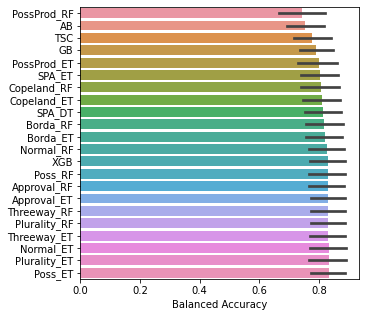

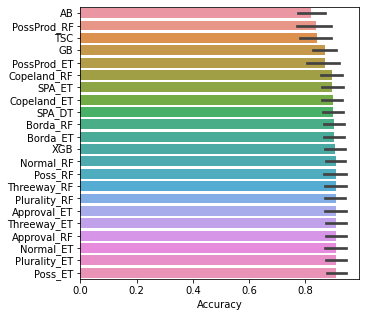

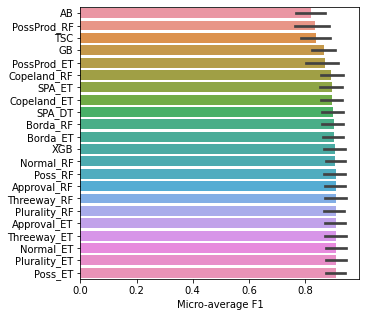

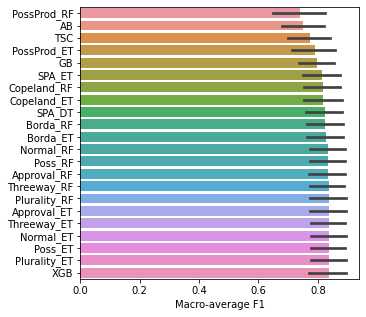

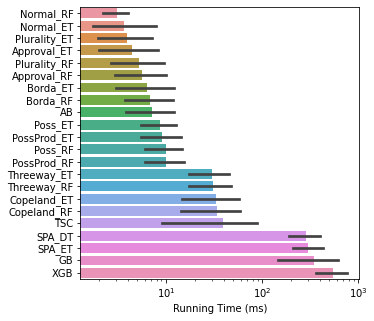

In [6]:
import seaborn

for metric in metrics:
    plt.figure(figsize=(5,5))
    if metric != 'time':
        seaborn.barplot(data=pd.DataFrame(dic[metric],
                                 index=dic[metric].index, columns = dic[metric].columns),
                       orient='h',
                       order=list(average_df.sort_values(metric).index))
    else:
        seaborn.barplot(data=pd.DataFrame(dic[metric],
                                 index=dic[metric].index, columns = dic[metric].columns),
                       orient='h',
                       order=list(average_df.sort_values(metric).index))
        plt.xscale('log')
    plt.xlabel(metric_dict[metric])
    plt.savefig('./Results/Figures/vals_' + metric + ".png", dpi=300, bbox_inches='tight')

In [7]:
from scipy.stats import rankdata

ranks_df = pd.DataFrame(np.zeros((len(models), len(metrics))), index=shortened_names, columns=metrics)

for metric in metrics:
    m = -1
    if metric == 'time':
        m = 1
    ranks = pd.DataFrame(rankdata(m*dic[metric], axis=1),
                         index=dic[metric].index, columns = dic[metric].columns)
    ranks_df.loc[:, metric] = ranks.mean()
ranks_df

,balacc,acc,microf1,macrof1,time
AB,14.897059,17.794118,17.735294,15.367647,9.470588
GB,15.411765,17.705882,17.647059,16.205882,18.705882
XGB,9.294118,9.794118,9.735294,9.970588,20.705882
Normal_ET,7.661765,7.250000,7.161765,7.338235,2.411765
Approval_ET,8.279412,7.779412,7.720588,7.779412,3.647059
Plurality_ET,7.617647,7.205882,7.117647,7.235294,2.970588
Borda_ET,10.588235,10.073529,9.955882,10.411765,7.294118
Copeland_ET,12.676471,12.014706,11.897059,12.617647,12.602941
Poss_ET,7.617647,7.205882,7.117647,7.235294,11.500000
PossProd_ET,13.014706,13.735294,14.558824,15.014706,11.529412


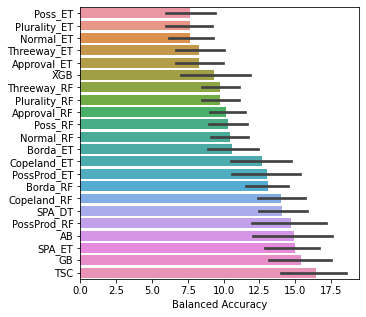

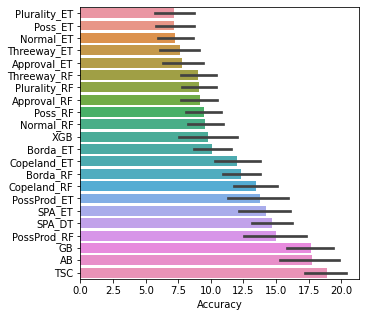

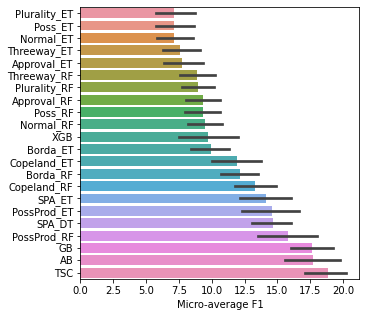

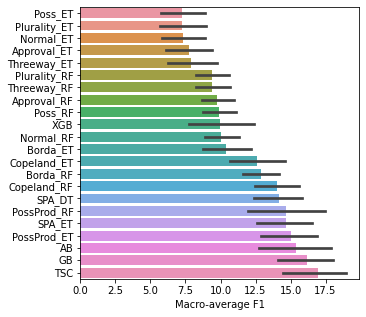

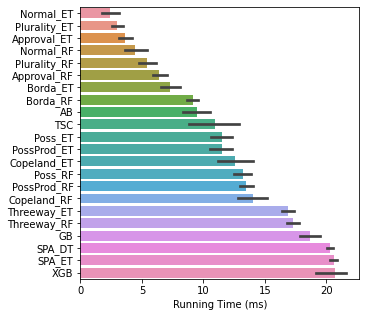

In [8]:
import seaborn

for metric in metrics:
    plt.figure(figsize=(5,5))
    m = -1
    if metric == 'time':
        m = 1
    seaborn.barplot(data=pd.DataFrame(rankdata(m*dic[metric], axis=1),
                             index=dic[metric].index, columns = dic[metric].columns),
                   orient='h',
                   order=list(ranks_df.sort_values(metric).index))
    plt.xlabel(metric_dict[metric])
    plt.savefig('./Results/Figures/ranks_' + metric + ".png", dpi=300, bbox_inches='tight')

In [9]:
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman

friedman_pvals = {}
dic_posthoc_pvals = {}

for metric in metrics:
    _, pvalue = friedmanchisquare(*(dic[metric].values[i, :] for i in range(dic[metric].shape[0])))
    friedman_pvals[metric] = pvalue
    pvalues = posthoc_nemenyi_friedman(dic[metric])
    dic_posthoc_pvals[metric] = pvalues

dic_posthoc_pvals[metric]

,AB,GB,XGB,Normal_ET,Approval_ET,Plurality_ET,Borda_ET,Copeland_ET,Poss_ET,PossProd_ET,...,Approval_RF,Plurality_RF,Borda_RF,Copeland_RF,Poss_RF,PossProd_RF,Threeway_RF,SPA_DT,SPA_ET,TSC
AB,1.000000,0.001000,0.001000,0.001521,0.035226,0.006969,0.900000,0.900000,0.900000,0.900000,...,0.900000,0.559590,0.900000,0.330352,0.696153,0.572002,0.001000,0.001000,0.001000,0.900000
GB,0.001000,1.000000,0.900000,0.001000,0.001000,0.001000,0.001000,0.018611,0.001000,0.001084,...,0.001000,0.001000,0.001000,0.282086,0.069728,0.121615,0.900000,0.900000,0.900000,0.001000
XGB,0.001000,0.900000,1.000000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,...,0.001000,0.001000,0.001000,0.004385,0.001000,0.001000,0.832716,0.900000,0.900000,0.001000
Normal_ET,0.001521,0.001000,0.001000,1.000000,0.900000,0.900000,0.207806,0.001000,0.001000,0.001000,...,0.578212,0.900000,0.004051,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
Approval_ET,0.035226,0.001000,0.001000,0.900000,1.000000,0.900000,0.733396,0.001000,0.001000,0.001000,...,0.900000,0.900000,0.073972,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
Plurality_ET,0.006969,0.001000,0.001000,0.900000,0.900000,1.000000,0.444025,0.001000,0.001000,0.001000,...,0.814093,0.900000,0.016763,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
Borda_ET,0.900000,0.001000,0.001000,0.207806,0.733396,0.444025,1.000000,0.099995,0.497492,0.484707,...,0.900000,0.900000,0.900000,0.003741,0.028910,0.014550,0.001000,0.001000,0.001000,0.720981
Copeland_ET,0.900000,0.018611,0.001000,0.001000,0.001000,0.001000,0.099995,1.000000,0.900000,0.900000,...,0.015619,0.001037,0.801678,0.900000,0.900000,0.900000,0.276260,0.001000,0.001000,0.900000
Poss_ET,0.900000,0.001000,0.001000,0.001000,0.001000,0.001000,0.497492,0.900000,1.000000,0.900000,...,0.152182,0.019268,0.900000,0.900000,0.900000,0.900000,0.037574,0.001000,0.001000,0.900000
PossProd_ET,0.900000,0.001084,0.001000,0.001000,0.001000,0.001000,0.484707,0.900000,0.900000,1.000000,...,0.144390,0.017977,0.900000,0.900000,0.900000,0.900000,0.040050,0.001000,0.001000,0.900000


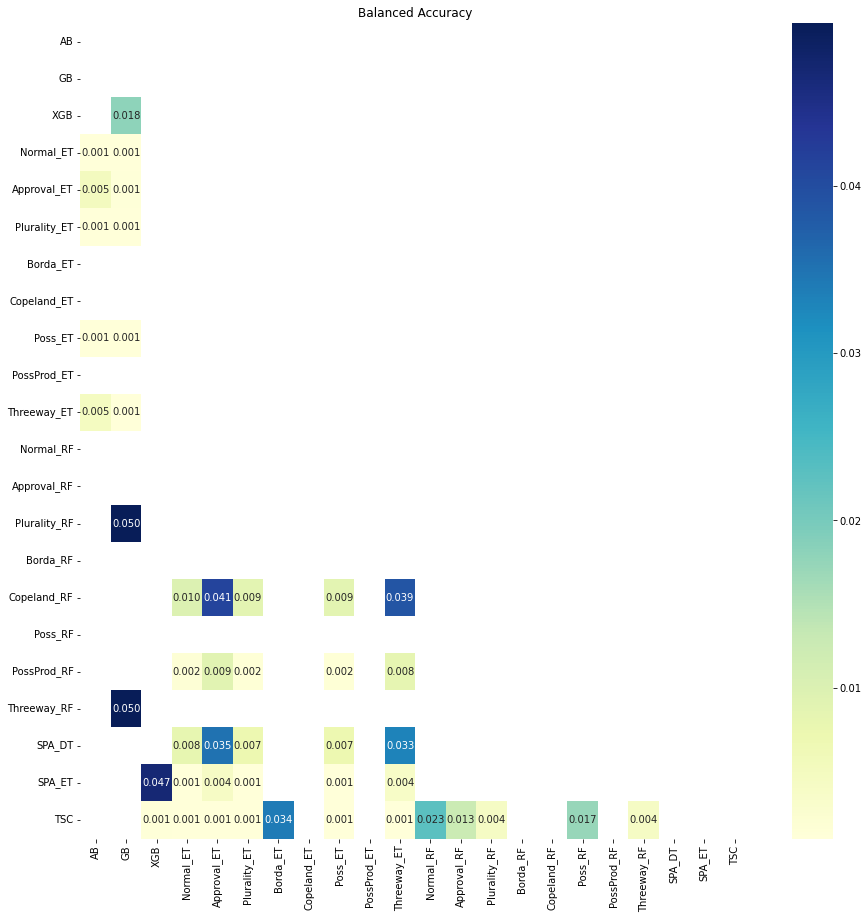

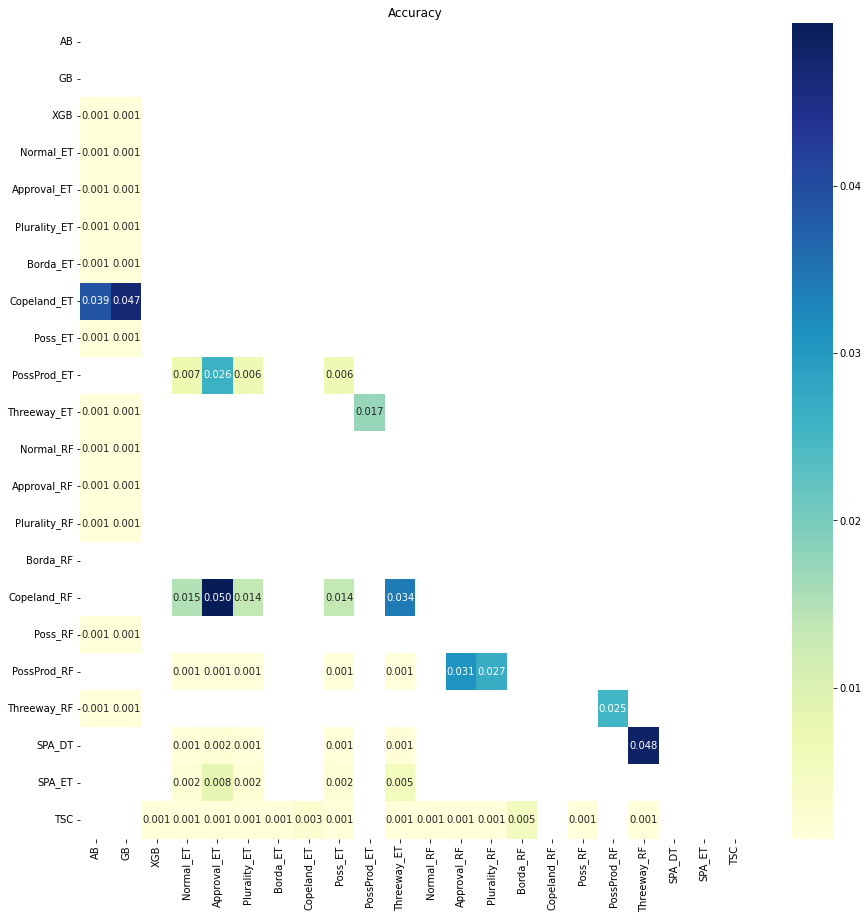

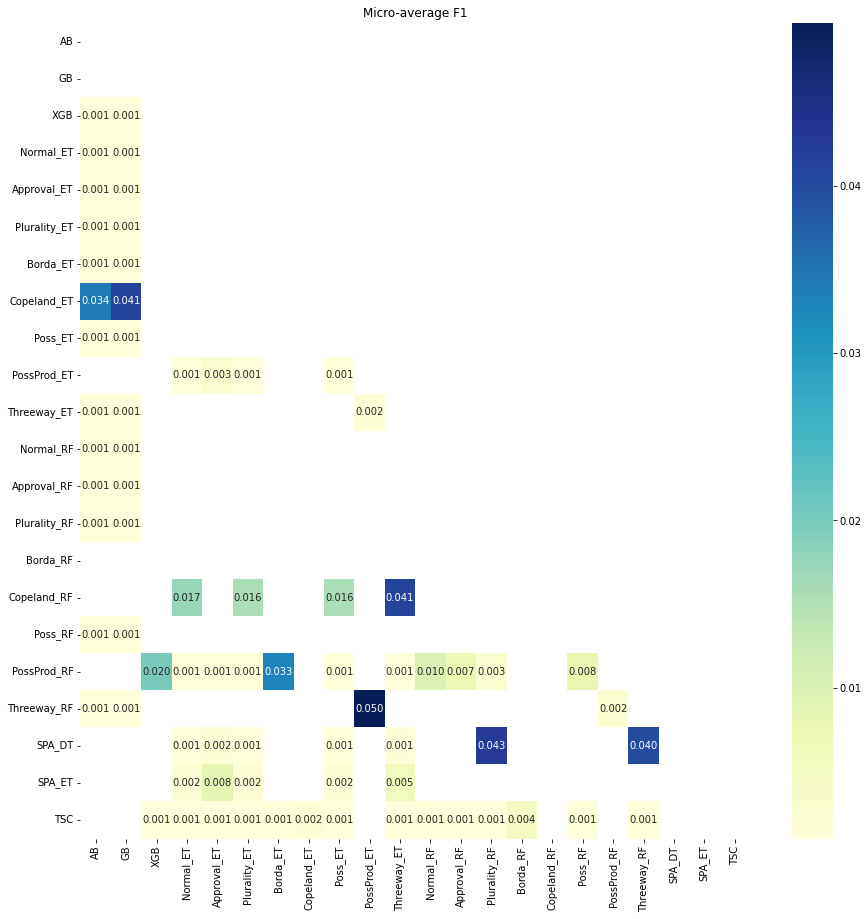

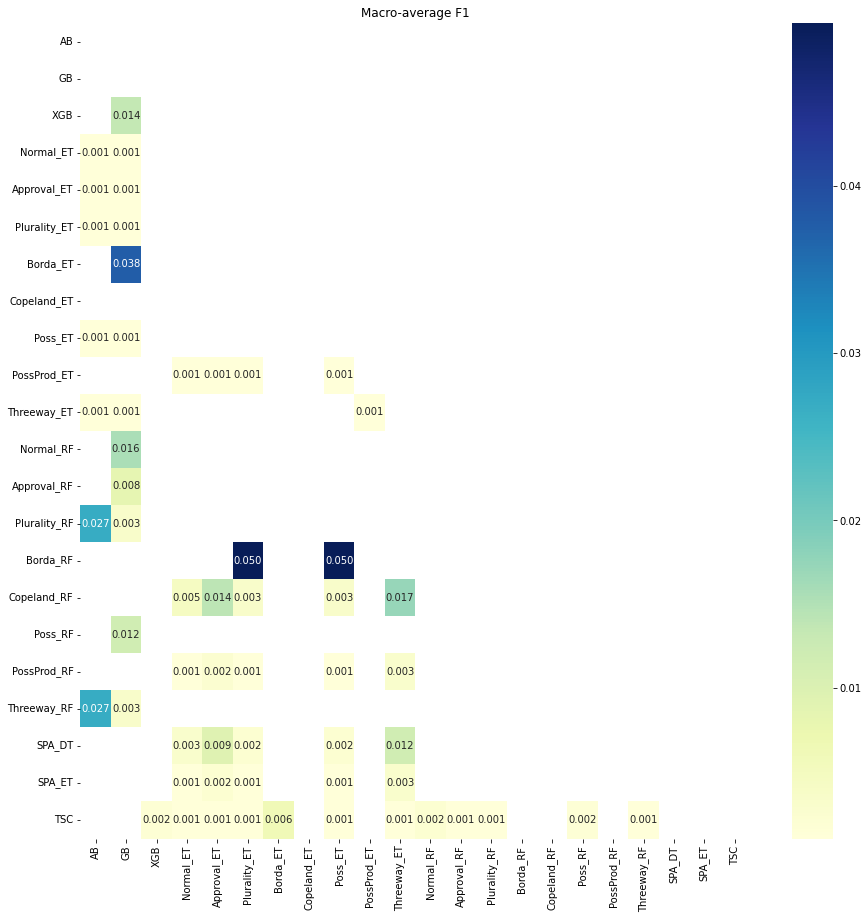

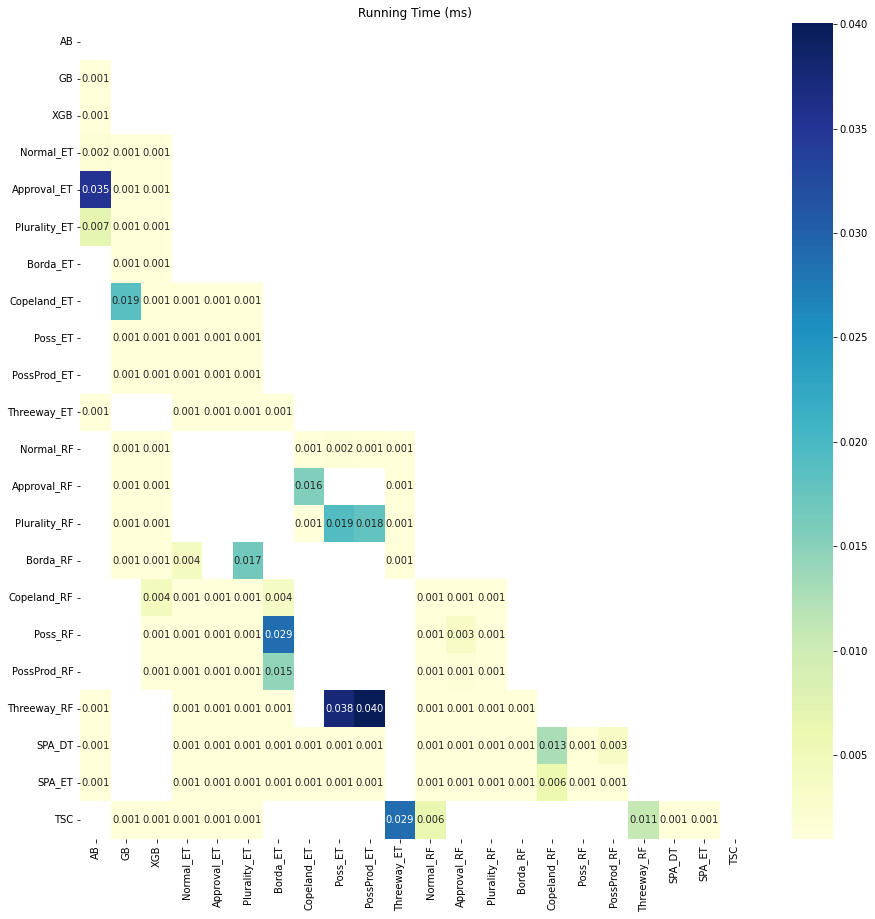

In [10]:
for metric in metrics:
    plt.figure(figsize=(15,15))
    matrix = np.tril(dic_posthoc_pvals[metric])
    ones = np.triu(np.ones(matrix.shape))
    matrix += ones
    matrix = pd.DataFrame(matrix, index=shortened_names, columns = shortened_names)
    mask = matrix > 0.05
    seaborn.heatmap(matrix, 
                    mask=mask,
                    annot=True, fmt=".3f",
                   cmap="YlGnBu")
    plt.title(metric_dict[metric])
    plt.savefig("./Results/Figures/pvalues_" + metric + ".png", dpi=300, bbox_inches='tight')

In [11]:
binary_datasets = df_atts[(df_atts['Classi'] == 2)].index
less_than_10_classes = df_atts[(df_atts['Classi'] > 3) & (df_atts['Classi'] < 10)].index
more_than_10_classes = df_atts[(df_atts['Classi'] >= 10)].index

dfs_by_classes = {"Binary": binary_datasets,
                  "Less than 10 Classes": less_than_10_classes,
                  "More than 10 Classes": more_than_10_classes}

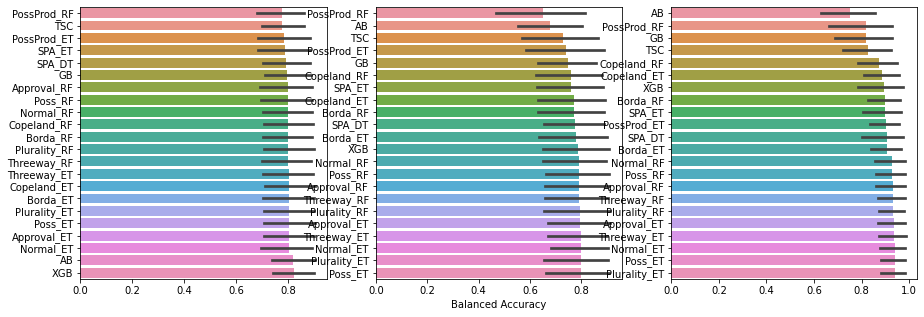

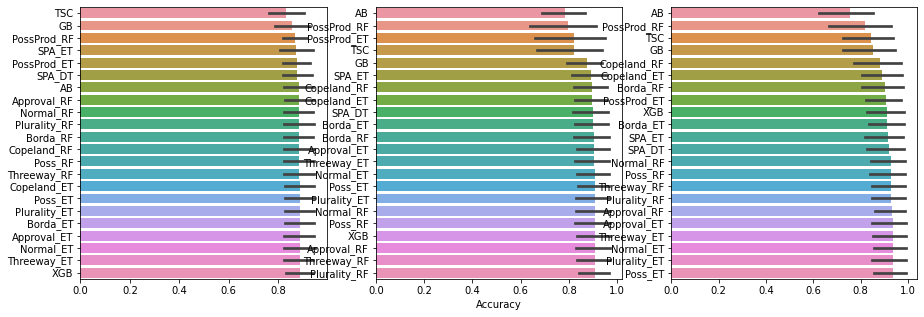

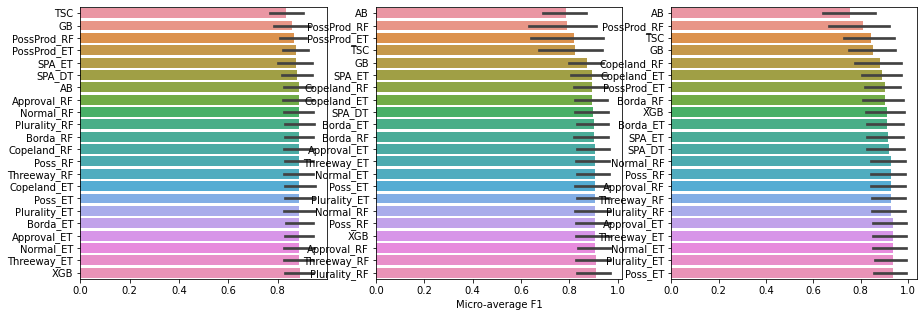

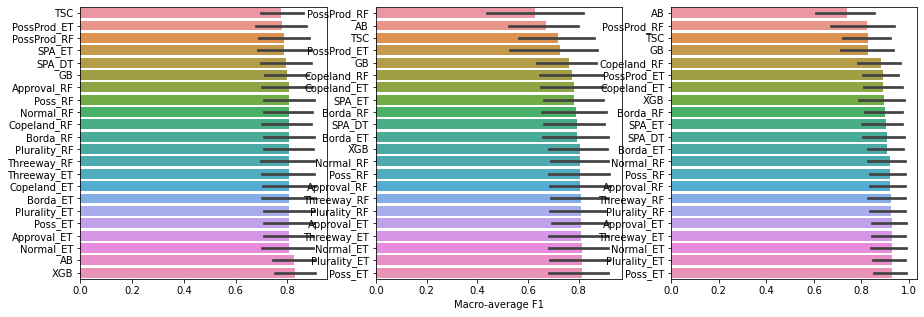

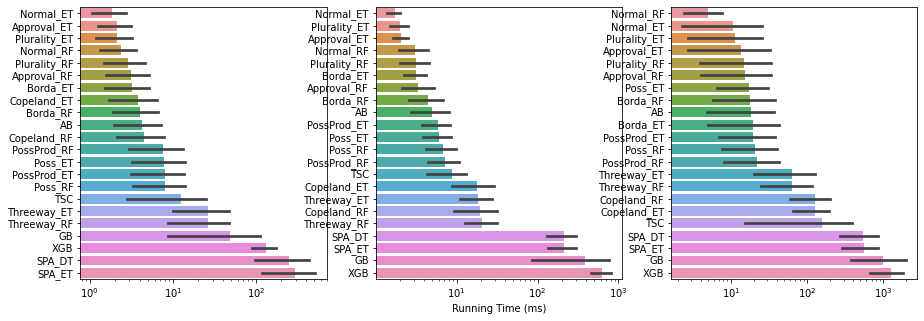

In [12]:
for metric in metrics:
    k = 0
    
    f, axs = plt.subplots(1,3,figsize=(15,5))
    
    for key in dfs_by_classes:
        
        data_temp = pd.DataFrame(dic[metric], index=dic[metric].index, columns = dic[metric].columns)
        data_temp = data_temp.loc[list(dfs_by_classes[key]),:]
        avg_temp = data_temp.mean()
        seaborn.barplot(data=data_temp,
                       orient='h',
                       order=list(avg_temp.sort_values().index), ax=axs[k])
        if k == 1:
            axs[k].set_xlabel(metric_dict[metric])
        if metric == 'time':
            axs[k].set_xscale('log')
        k += 1
        
    plt.savefig('./Results/Figures/classes_ranks_' + metric + ".png", dpi=300, bbox_inches='tight')

In [13]:
np.triu(dic_posthoc_pvals[metric])

array([[1.        , 0.001     , 0.001     , 0.00152087, 0.03522602,
        0.00696869, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.001     , 0.16423566, 0.9       , 0.55958952, 0.9       ,
        0.33035175, 0.69615284, 0.57200218, 0.001     , 0.001     ,
        0.001     , 0.9       ],
       [0.        , 1.        , 0.9       , 0.001     , 0.001     ,
        0.001     , 0.001     , 0.018611  , 0.001     , 0.00108428,
        0.9       , 0.001     , 0.001     , 0.001     , 0.001     ,
        0.2820865 , 0.06972776, 0.12161548, 0.9       , 0.9       ,
        0.9       , 0.001     ],
       [0.        , 0.        , 1.        , 0.001     , 0.001     ,
        0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
        0.65890744, 0.001     , 0.001     , 0.001     , 0.001     ,
        0.00438503, 0.001     , 0.001     , 0.8327159 , 0.9       ,
        0.9       , 0.001     ],
       [0.        , 0.        , 0.        , 1.        , 0.9       ,
        0.9      